In [1]:
#install relevant packages
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

You should consider upgrading via the '/Users/emirysaglam/GitHub/Bitirme/bitirme-venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/emirysaglam/GitHub/Bitirme/bitirme-venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/emirysaglam/GitHub/Bitirme/bitirme-venv/bin/python -m pip install --upgrade pip' command.


In [2]:
#import packages
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

# Load Competiton, Match, and Event Data from statsbombpy

In [3]:
#call statsbombpy API to get all free competitions
free_comps = sb.competitions()

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#print a list of free competitions
free_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
5,16,2,Europe,Champions League,male,False,False,2016/2017,2024-02-13T02:37:32.205154,2021-06-13T16:17:31.694,None,2024-02-13T02:37:32.205154
6,16,27,Europe,Champions League,male,False,False,2015/2016,2024-06-12T07:45:38.786894,2021-06-13T16:17:31.694,None,2024-06-12T07:45:38.786894
7,16,26,Europe,Champions League,male,False,False,2014/2015,2024-02-12T12:49:54.914228,2021-06-13T16:17:31.694,None,2024-02-12T12:49:54.914228
8,16,25,Europe,Champions League,male,False,False,2013/2014,2024-02-12T12:48:48.479157,2021-06-13T16:17:31.694,None,2024-02-12T12:48:48.479157
9,16,24,Europe,Champions League,male,False,False,2012/2013,2024-02-12T12:47:34.340413,2021-06-13T16:17:31.694,None,2024-02-12T12:47:34.340413


In [4]:
#call the statsbombpy API to get a list of matches for a given competition

#2015/16 La Liga Competition_id = 11, season_id = 27
#2015/16 Bundesliga Competition_id = 9, season_id = 27
#2015/16 Premier League Competition_id = 2, season_id = 27
#2015/16 Serie A Competition_id = 12, season_id = 27
#2015/16 Ligue 1 Competition_id = 7, season_id = 27

#FIFA World Cup 22 competition_id=43, season_id=106
#FIFA World Cup 18 competition_id=43, season_id=3
#Euro 2024 competition_id=55, season_id=282
#Euro 2020 competition_id=55, season_id=43

#Messinin Barça kariyeri verisi



euro_2024_matches = sb.matches(competition_id=55, season_id=282)

#print the first 5 matches listed
euro_2024_matches["match_id"].unique()

array([3942819, 3943043, 3942752, 3942382, 3942349, 3930180, 3930171,
       3942227, 3942226, 3938645, 3930184, 3941022, 3941021, 3941020,
       3941019, 3941018, 3941017, 3930182, 3930179, 3940983, 3940878,
       3930177, 3930173, 3930172, 3930167, 3930168, 3930165, 3930164,
       3930161, 3938637, 3938640, 3938642, 3938639, 3938641, 3938644,
       3938643, 3938638, 3930183, 3930181, 3930178, 3930176, 3930175,
       3930174, 3930170, 3930169, 3930166, 3930163, 3930162, 3930160,
       3930159, 3930158])

In [5]:
# Define the list of competition and season pairs
competitions_and_seasons = [
(11, 27, "2015/16 La Liga"),
(9, 27, "2015/16 Bundesliga"),
(2, 27, "2015/16 Premier League"),
(12, 27, "2015/16 Serie A"),
(7, 27, "2015/16 Ligue 1"),
(43, 106, "FIFA World Cup 22"),
(43, 3, "FIFA World Cup 18"),
(55, 282, "Euro 2024"),
(55, 43, "Euro 2020")  
]


# Initialize a dictionary to store the results
match_counts = {}
# Iterate over each competition and season pair
for competition_id, season_id, competition_name in competitions_and_seasons:
    # Retrieve the matches for the given competition and season
    matches = sb.matches(competition_id=competition_id, season_id=season_id)
    
    # Extract unique match IDs
    unique_match_ids = matches["match_id"].unique()
    
    # Store the count of unique match IDs for this competition and season
    match_counts[f'Competition {competition_name}'] = len(unique_match_ids)

# Output the results
for competition_season, count in match_counts.items():
    print(f"{competition_season}: {count} unique matches")


Competition 2015/16 La Liga: 380 unique matches
Competition 2015/16 Bundesliga: 306 unique matches
Competition 2015/16 Premier League: 380 unique matches
Competition 2015/16 Serie A: 380 unique matches
Competition 2015/16 Ligue 1: 377 unique matches
Competition FIFA World Cup 22: 64 unique matches
Competition FIFA World Cup 18: 64 unique matches
Competition Euro 2024: 51 unique matches
Competition Euro 2020: 51 unique matches


In [6]:
# Define the list of competition and season pairs

competitions_and_seasons = [
(11, 90, "La Liga 20/21"),
(11, 42, "La Liga 19/20"),
(11, 4, "La Liga 18/19"),
(11, 1, "La Liga 17/18"),
(11, 2, "La Liga 16/17"),
(11, 27, "La Liga 15/16"),
(11, 26, "La Liga 14/15"),
(11, 25, "La Liga 13/14"),
(11, 24, "La Liga 12/13"),
(11, 23, "La Liga 11/12"),
(11, 22, "La Liga 10/11"),
(11, 21, "La Liga 09/10"),
(11, 41, "La Liga 08/09"),
(11, 40, "La Liga 07/08"),
(11, 39, "La Liga 06/07"),
(11, 38, "La Liga 05/06"),
(11, 37, "La Liga 04/05")]


# Initialize a dictionary to store the results
match_counts = {}
# Iterate over each competition and season pair
for competition_id, season_id, competition_name in competitions_and_seasons:
    # Retrieve the matches for the given competition and season
    matches = sb.matches(competition_id=competition_id, season_id=season_id)
    
    # Extract unique match IDs
    unique_match_ids = matches["match_id"].unique()
    
    # Store the count of unique match IDs for this competition and season
    match_counts[f'Competition {competition_name}'] = len(unique_match_ids)

# Output the results
for competition_season, count in match_counts.items():
    print(f"{competition_season}: {count} unique matches")


Competition La Liga 20/21: 35 unique matches
Competition La Liga 19/20: 33 unique matches
Competition La Liga 18/19: 34 unique matches
Competition La Liga 17/18: 36 unique matches
Competition La Liga 16/17: 34 unique matches
Competition La Liga 15/16: 380 unique matches
Competition La Liga 14/15: 38 unique matches
Competition La Liga 13/14: 31 unique matches
Competition La Liga 12/13: 32 unique matches
Competition La Liga 11/12: 37 unique matches
Competition La Liga 10/11: 33 unique matches
Competition La Liga 09/10: 35 unique matches
Competition La Liga 08/09: 31 unique matches
Competition La Liga 07/08: 28 unique matches
Competition La Liga 06/07: 26 unique matches
Competition La Liga 05/06: 17 unique matches
Competition La Liga 04/05: 7 unique matches


In [7]:
#create a variable for the team you want to look into
team="England"

#filter for only matches that the focus team played in
matches_df = euro_2024_matches[(euro_2024_matches['home_team'] == team)|(euro_2024_matches['away_team'] == team)]

#sort by match date to get the most recent match
matches_df=matches_df.sort_values(by='match_date', ascending=False)

In [8]:
matches_df.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,available,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,available,2024-07-15T07:54:23.583297,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
7,3942227,2024-07-06,19:00:00.000,Europe - UEFA Euro,2024,England,Switzerland,1,1,available,available,2024-07-14T15:55:52.682165,2024-07-14T15:57:51.414762,5,Quarter-finals,Merkur Spiel-Arena,Daniele Orsato,Gareth Southgate,Murat Yakin,1.1.0,2,2
16,3941017,2024-06-30,19:00:00.000,Europe - UEFA Euro,2024,England,Slovakia,2,1,available,available,2024-07-10T11:29:00.136519,2024-07-10T11:31:44.852038,4,Round of 16,VELTINS-Arena,Halil Umut Meler,Gareth Southgate,Francesco Calzona,1.1.0,2,2
38,3930181,2024-06-25,22:00:00.000,Europe - UEFA Euro,2024,England,Slovenia,0,0,available,available,2024-07-10T14:26:49.966712,2024-07-10T14:27:59.561474,3,Group Stage,RheinEnergieStadion,Clément Turpin,Gareth Southgate,Matjaž Kek,1.1.0,2,2


In [9]:
#create a variable containing the first match id in the data frame
latest_match_id = matches_df.match_id.iloc[0]

#latest_match_id=3943043

In [10]:
#call the statsbombpy events API to bring in the event data for the match
events_df = sb.events(match_id=latest_match_id)

#print the first 5 rows of data
events_df.head(5)

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50aa204f-5d65-4145-8597-5d5628fb7898,1,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Spain,772,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a279cbee-9ab3-4cfb-9c51-27cacc1bf2a2,2,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d2126e70-9f04-4bb7-ba2b-9377836d1757,3,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,[54d78bfa-4146-42bd-acdc-97bcd393dd81],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54d78bfa-4146-42bd-acdc-97bcd393dd81,4,NaN,NaN,NaN,3943043,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Spain,772,[d2126e70-9f04-4bb7-ba2b-9377836d1757],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7230470a-8ceb-4eb8-a66f-d72a2afb12d6,1706,NaN,NaN,NaN,3943043,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Regular Play,NaN,NaN,NaN,79,Spain,772,[cb9ba06c-a673-448d-ab21-755d330fcadc],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN


In [11]:
#print a list of columns available in the event data
events_df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist

In [12]:
#separate start and end locations from coordinates
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)
events_df[['carry_end_x', 'carry_end_y']] = events_df['carry_end_location'].apply(pd.Series)

# Example One: Passes and Carries into the Final Third

"Which players progressed the ball into the final third the most?"

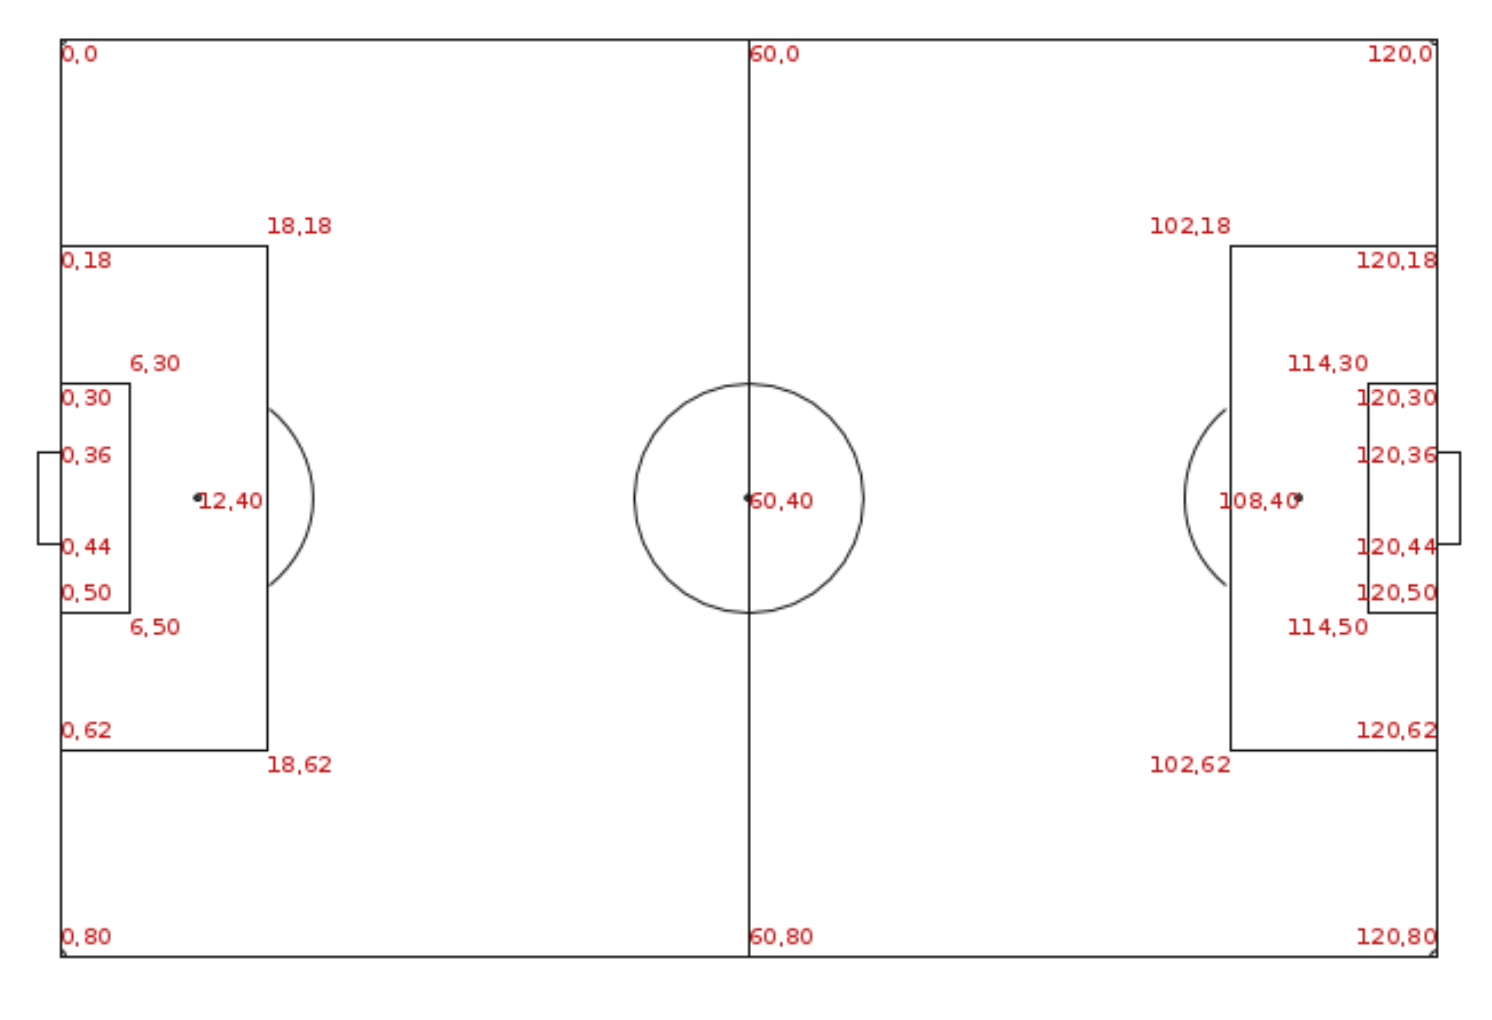

## Data Manipulation

In [13]:
events_df.pass_outcome.unique()

array([nan, 'Out', 'Incomplete', 'Unknown', 'Pass Offside'], dtype=object)

In [31]:
#filter for events done by the focus team
#filter by event type to get only passes
#filter for passes that started outside of the final third
#filter for passes that ended in the final third
#filter for completed passes
f3rd_passes=events_df[(events_df.team==team)&(events_df.type=="Pass")&(events_df.x<80)&(events_df.pass_end_x>80)&(events_df.pass_outcome.isna())]

#get count for each player
f3rd_passes_count=f3rd_passes.groupby('player').size().reset_index()

In [32]:
f3rd_passes_count

,player,0
0,Cole Palmer,1
1,Harry Kane,1
2,John Stones,2
3,Jordan Pickford,1
4,Jude Bellingham,1
5,Kyle Walker,4
6,Marc Guehi,1


In [33]:
#rename second column
f3rd_passes_count.rename(columns={f3rd_passes_count.columns[1]: "Passes" }, inplace = True)

In [34]:
f3rd_passes_count

,player,Passes
0,Cole Palmer,1
1,Harry Kane,1
2,John Stones,2
3,Jordan Pickford,1
4,Jude Bellingham,1
5,Kyle Walker,4
6,Marc Guehi,1


In [35]:
#get final third carries for focus team
f3rd_carries=events_df[(events_df.type=="Carry")&(events_df.x<80)&(events_df.carry_end_x>80)&(events_df.team==team)]

#get count for each player
f3rd_carries_count=f3rd_carries.groupby('player').size().reset_index()

#rename second column
f3rd_carries_count.rename(columns={f3rd_carries_count.columns[1]: "Carries" }, inplace = True)

In [36]:
f3rd_carries_count

,player,Carries
0,Bukayo Saka,4
1,Cole Palmer,1
2,Harry Kane,1
3,John Stones,1
4,Jude Bellingham,4
5,Luke Shaw,1
6,Phil Foden,1


In [37]:
#combine dataframes
progressions_df=pd.merge(f3rd_passes_count, f3rd_carries_count,
                    how="outer", on=["player"])

In [38]:
progressions_df

,player,Passes,Carries
0,Bukayo Saka,NaN,4.0
1,Cole Palmer,1.0,1.0
2,Harry Kane,1.0,1.0
3,John Stones,2.0,1.0
4,Jordan Pickford,1.0,NaN
5,Jude Bellingham,1.0,4.0
6,Kyle Walker,4.0,NaN
7,Luke Shaw,NaN,1.0
8,Marc Guehi,1.0,NaN
9,Phil Foden,NaN,1.0


In [39]:
#add 0 where value is NaN
progressions_df=progressions_df.fillna(0)

In [40]:
progressions_df

,player,Passes,Carries
0,Bukayo Saka,0.0,4.0
1,Cole Palmer,1.0,1.0
2,Harry Kane,1.0,1.0
3,John Stones,2.0,1.0
4,Jordan Pickford,1.0,0.0
5,Jude Bellingham,1.0,4.0
6,Kyle Walker,4.0,0.0
7,Luke Shaw,0.0,1.0
8,Marc Guehi,1.0,0.0
9,Phil Foden,0.0,1.0


In [41]:
#add a new column with the total
progressions_df['total']=progressions_df['Passes']+progressions_df['Carries']

In [42]:
progressions_df

,player,Passes,Carries,total
0,Bukayo Saka,0.0,4.0,4.0
1,Cole Palmer,1.0,1.0,2.0
2,Harry Kane,1.0,1.0,2.0
3,John Stones,2.0,1.0,3.0
4,Jordan Pickford,1.0,0.0,1.0
5,Jude Bellingham,1.0,4.0,5.0
6,Kyle Walker,4.0,0.0,4.0
7,Luke Shaw,0.0,1.0,1.0
8,Marc Guehi,1.0,0.0,1.0
9,Phil Foden,0.0,1.0,1.0


In [43]:
progressions_df.sort_values(by='total', ascending=False, inplace=True)

In [44]:
progressions_df

,player,Passes,Carries,total
5,Jude Bellingham,1.0,4.0,5.0
0,Bukayo Saka,0.0,4.0,4.0
6,Kyle Walker,4.0,0.0,4.0
3,John Stones,2.0,1.0,3.0
1,Cole Palmer,1.0,1.0,2.0
2,Harry Kane,1.0,1.0,2.0
4,Jordan Pickford,1.0,0.0,1.0
7,Luke Shaw,0.0,1.0,1.0
8,Marc Guehi,1.0,0.0,1.0
9,Phil Foden,0.0,1.0,1.0


## Visualise

<Figure size 1500x1500 with 0 Axes>

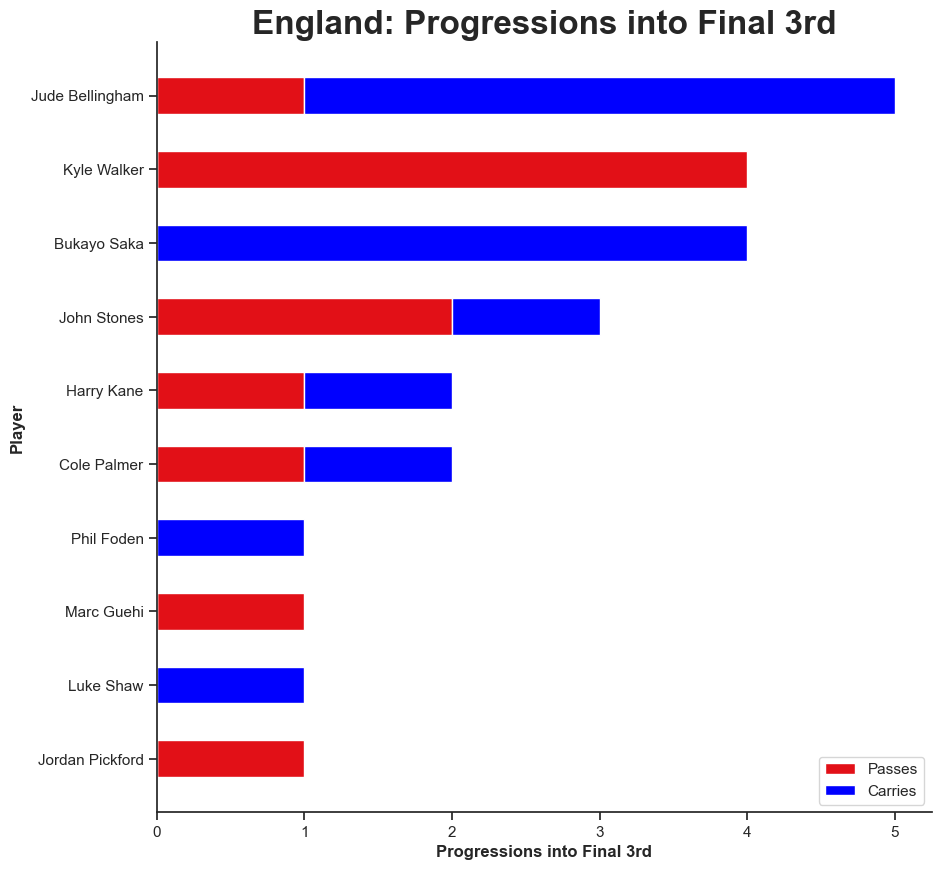

In [45]:
#create stacked bar chart
pass_colour='#e21017'
carry_colour='blue'

#sort to get lowest values first (so that it plots in the correct order on our bar chart)
progressions_df.sort_values(by='total', ascending=True, inplace=True)

#include only relevant columns
barchart_df=progressions_df[["player", "Passes", "Carries"]]


#create figure and set some style parameters
plt.figure(figsize = (15,15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks")

#create bar chart
barchart_df.set_index('player').plot(kind='barh', stacked=True,color=[pass_colour, carry_colour],legend=True,figsize=(10,10))

#add chart labels and title
plt.xlabel(xlabel="Progressions into Final 3rd",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.ylabel(ylabel="Player",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.title(f"{team}: Progressions into Final 3rd",fontdict = { 'fontsize': 24, 'weight':'bold'})

#keep two axes
sns.despine(top=True, right=True, left=False, bottom=False)
plt.autoscale()
plt.show()

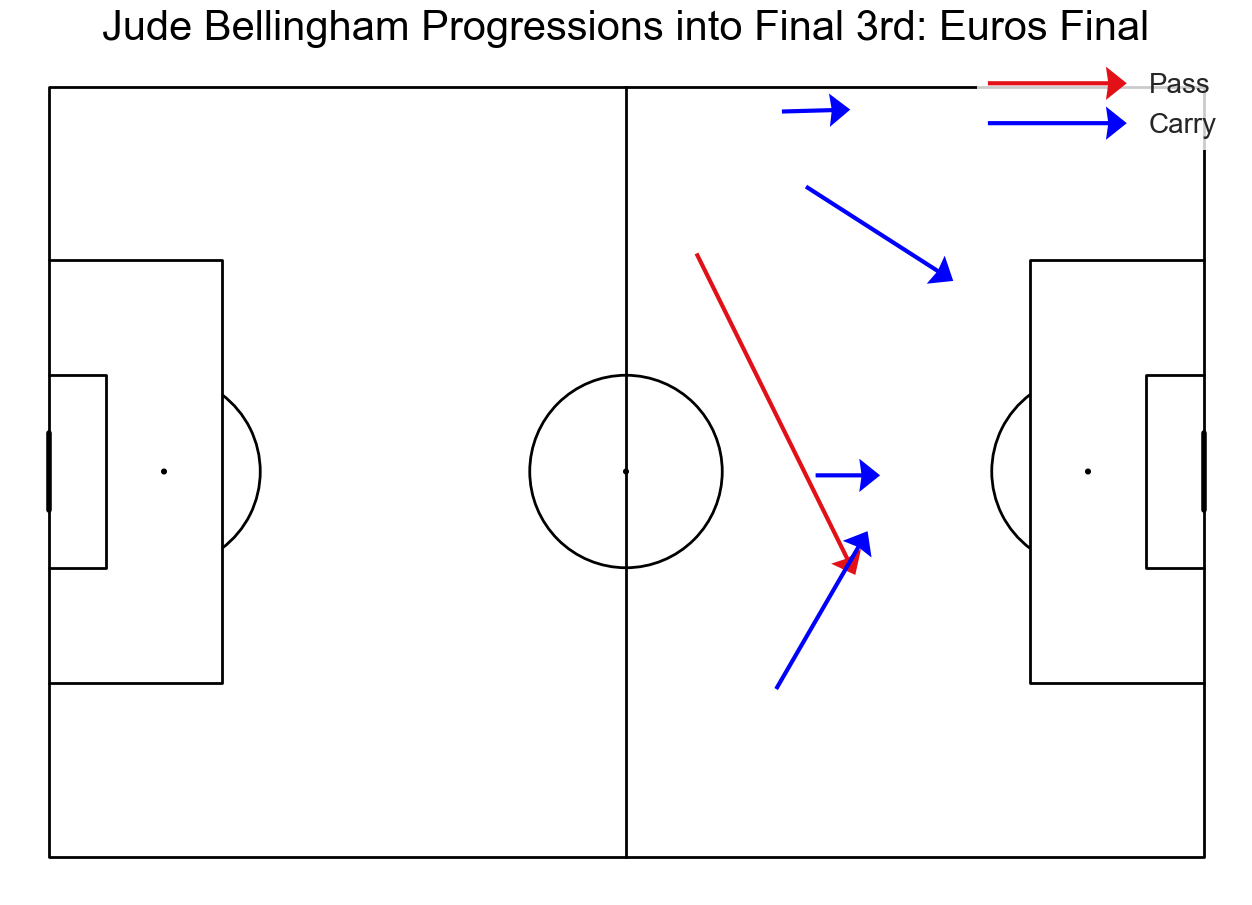

In [46]:
#visualise for a given player
player_name="Jude Bellingham"

player_passes=f3rd_passes[(f3rd_passes.player==player_name)]
player_carries=f3rd_carries[(f3rd_carries.player==player_name)]

#set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

#plot the passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

#plot the carries
pitch.arrows(player_carries.x, player_carries.y,
player_carries.carry_end_x, player_carries.carry_end_y, width=3,
headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

#set title of viz
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd: Euros Final', fontsize=30,color='black')

# Example Two: Comparing Touch Maps

"Was player A's on ball position similar to player B's?"

## Data Manipulation

In [47]:
player1="Luke Shaw"
player2="Kyle Walker"
touches=['Pass', 'Ball Receipt*', 'Carry', 'Clearance', 'Foul Won', 'Block',
'Ball Recovery', 'Duel', 'Dribble', 'Interception', 'Miscontrol', 'Shot']

In [48]:
player1_df=events_df[(events_df.player==player1)&(events_df.type.isin(touches))]
player2_df=events_df[(events_df.player==player2)&(events_df.type.isin(touches))]

## Visualise

In [49]:
#create colour map
colour1="white"
colour2="#c3c3c3"
colour3="#e21017"
cmaplist = [colour1, colour2, colour3]
cmap = LinearSegmentedColormap.from_list("", cmaplist)

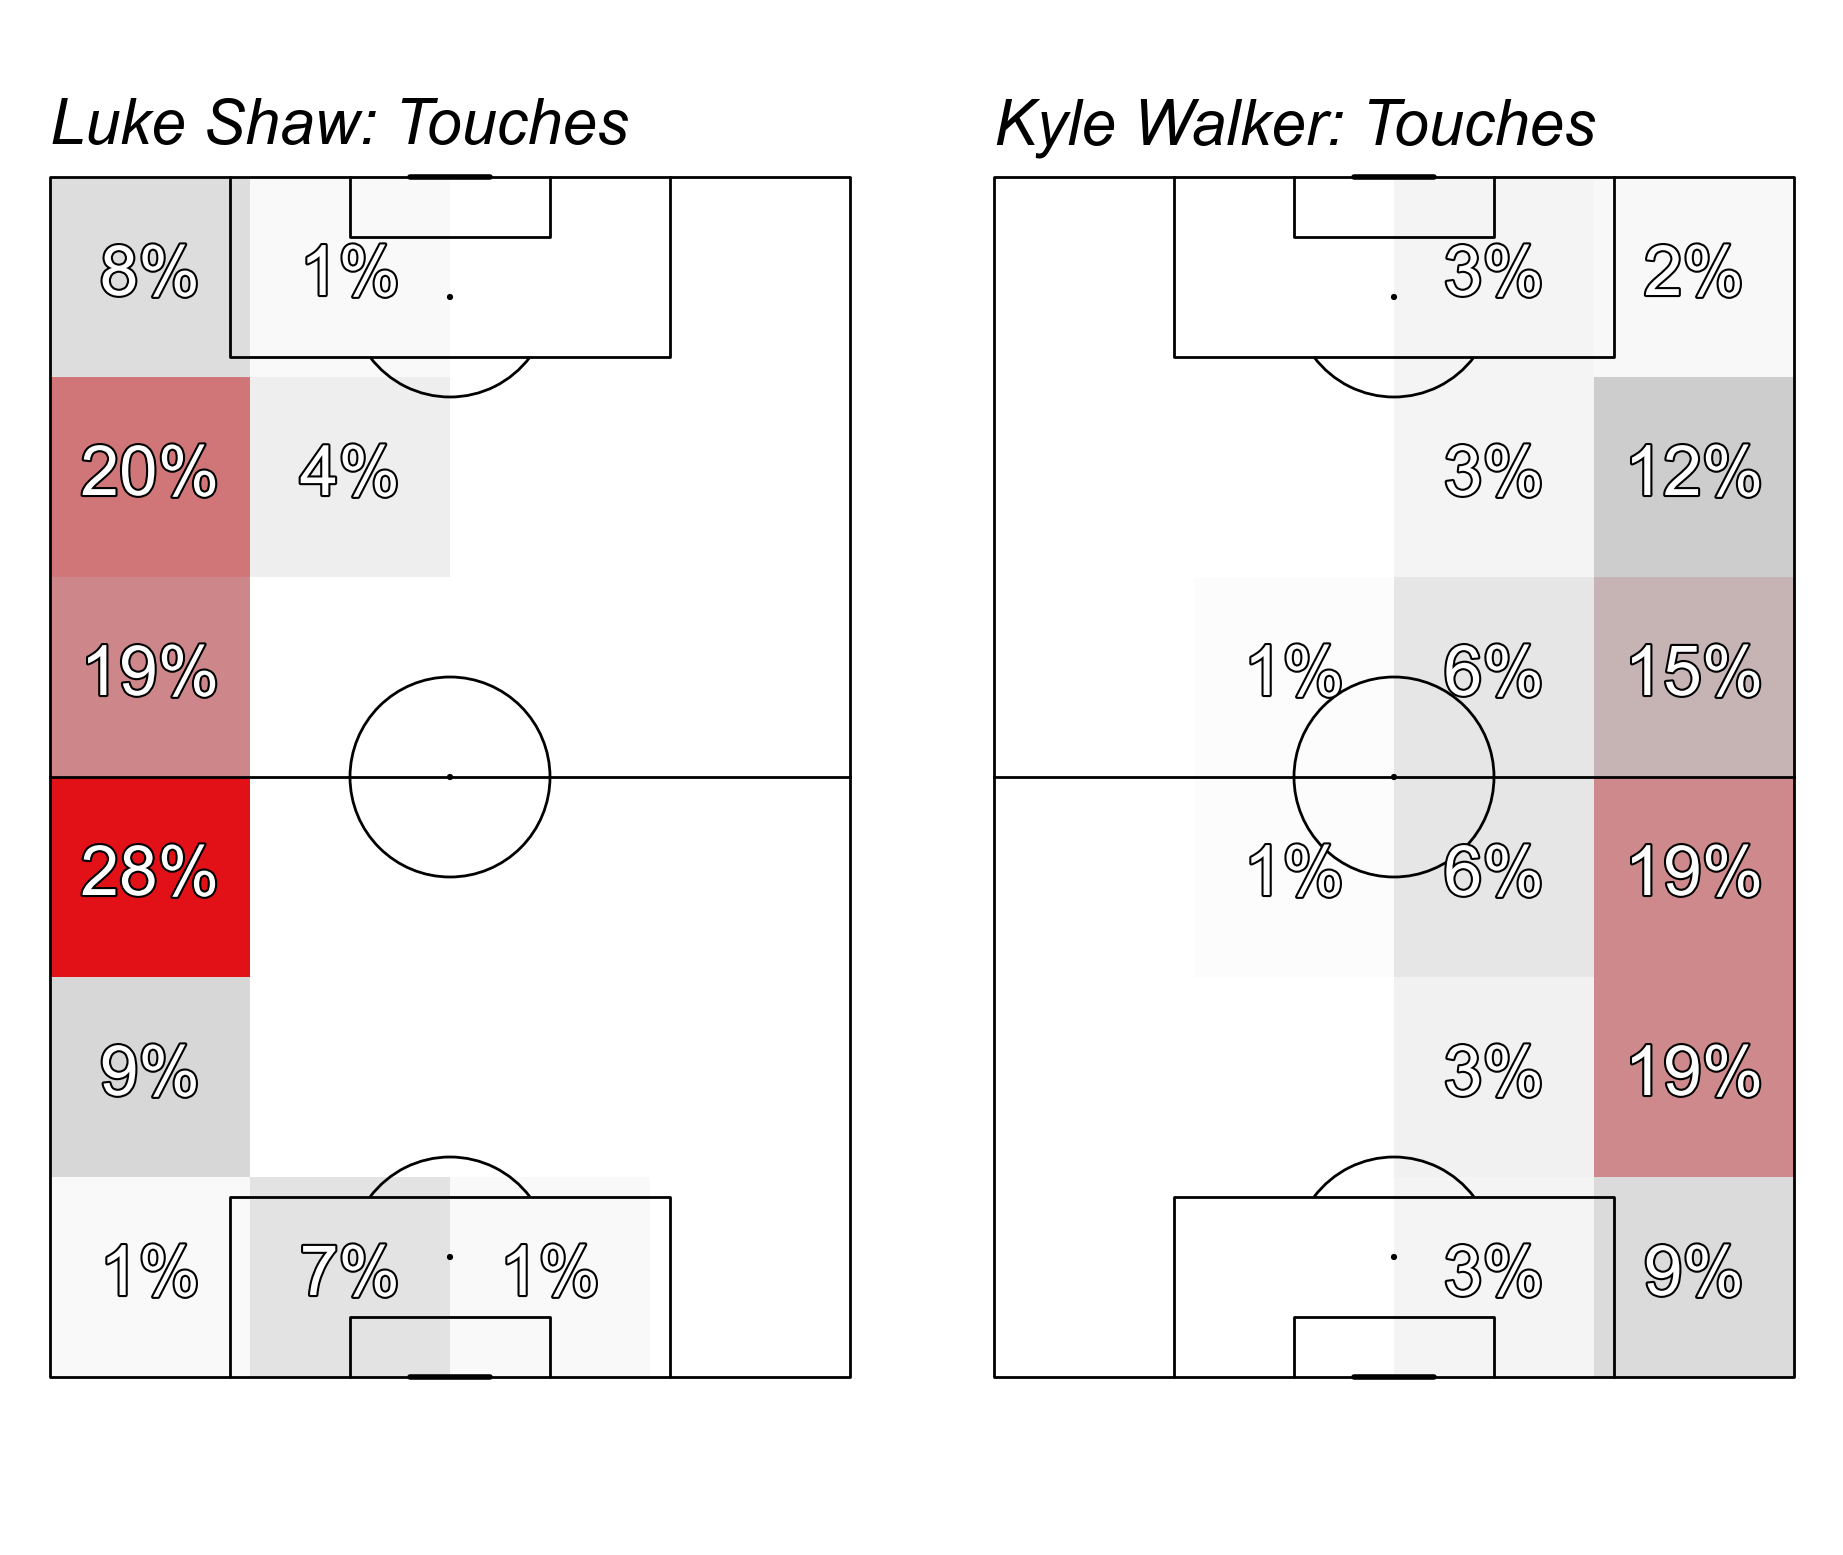

In [50]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

#create a grid of pitches
#define pitch style
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color='#000000', linewidth=2,half=False)

#create a grid - in this example, one row of two pitches
fig, axs = pitch.grid(nrows=1, ncols=2
                      ,figheight=16,
                      grid_width=0.65,
                      endnote_height=0.03, endnote_space=0.05,
                      axis=False,title_space=0.02, title_height=0.06, grid_height=0.8)

#get data for heatmap
#player1
bin_statistic1 = pitch.bin_statistic(player1_df.x, player1_df.y, statistic='count',
bins=(6, 4),normalize=True)
#player2
bin_statistic2 = pitch.bin_statistic(player2_df.x, player2_df.y, statistic='count',
bins=(6, 4),normalize=True)

#calculate vmax value
#we want both our heatmaps to use the same colour spectrum
vmax1=bin_statistic1['statistic'].max()
vmax2=bin_statistic2['statistic'].max()

if vmax1>vmax2:
  vmax=vmax1
else:
  vmax=vmax2

#set vmin as zero
vmin=0

#plot heatmap for player1
heatmap1 = pitch.heatmap(bin_statistic1, ax=axs['pitch'][0], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate1 = pitch.label_heatmap(bin_statistic1, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][0],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player1}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][0],style='italic')


#plot heatmap for player2
heatmap2 = pitch.heatmap(bin_statistic2, ax=axs['pitch'][1], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate2 = pitch.label_heatmap(bin_statistic2, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][1],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player2}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][1],style='italic')

# Bonus

Get top xG Performers across the tournament. Create a shot map for the top player.

In [51]:
# get event data for entire season
comp_events_df=sb.competition_events(
     country='Europe',
     division='UEFA Euro',
     season='2024',
     gender="male")

/Users/emirysaglam/GitHub/Bitirme/bitirme-venv/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/emirysaglam/GitHub/Bitirme/bitirme-venv/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/emirysaglam/GitHub/Bitirme/bitirme-venv/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/emirysaglam/GitHub/Bitirme/bitirme-venv/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/emirysaglam/GitHub/Bitirme/bitirme-venv/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/emirysaglam/GitHub/Bitirme/bitirme-venv/lib

In [52]:
comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
comp_events_df[['pass_end_x', 'pass_end_y']] = comp_events_df['pass_end_location'].apply(pd.Series)
comp_events_df[['carry_end_x', 'carry_end_y']] = comp_events_df['carry_end_location'].apply(pd.Series)

/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_6018/2447140862.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_6018/2447140862.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comp_events_df[['x', 'y']] = comp_events_df['location'].apply(pd.Series)
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_6018/2447140862.py:2: PerformanceWarning: DataFrame is highly fragmented.  

In [53]:
# get non penalty shots and non penalty goals
shots_df=comp_events_df[(comp_events_df.type=="Shot")&(comp_events_df.shot_type!="Penalty")]
goals_df=comp_events_df[(comp_events_df.type=="Shot")&(comp_events_df.shot_type!="Penalty")&(comp_events_df.shot_outcome=="Goal")]

#shots
#get count for each player, include team info
shots_count=shots_df.groupby(['player','team']).size().reset_index()

#rename second column
shots_count.rename(columns={shots_count.columns[2]: "np Shots" }, inplace = True)


#goals
#get count for each player, include team info
goals_count=goals_df.groupby(['player', 'team']).size().reset_index()

#rename second column
goals_count.rename(columns={goals_count.columns[2]: "np Goals" }, inplace = True)


#xG
#get count for each player, include team info
xg_sum=shots_df.groupby(['player', 'team'])['shot_statsbomb_xg'].sum().reset_index()

#rename second column
xg_sum.rename(columns={xg_sum.columns[2]: "np xG" }, inplace = True)

#round up to 2 decimal places
xg_sum['np xG']=xg_sum['np xG'].round(2)

In [54]:
#combine dataframes
shot_stats=pd.merge(shots_count, goals_count,
                    how="outer", on=["player", "team"])

shot_stats=pd.merge(shot_stats, xg_sum,
                    how="outer", on=["player", "team"])

In [55]:
#add 0 where value is NaN
shot_stats=shot_stats.fillna(0)

#sort to get top goalscorers, change by=' ' to get top xG, or top Shots
shot_stats=shot_stats.sort_values(by='np xG', ascending=False)

In [56]:
shot_stats.head(10)

,player,team,np Shots,np Goals,np xG
109,Harry Kane,England,17,2.0,2.27
154,Kai Havertz,Germany,17,0.0,2.21
56,Cristiano Ronaldo dos Santos Aveiro,Portugal,22,0.0,2.19
206,Memphis Depay,Netherlands,18,1.0,1.95
276,Romelu Lukaku Menama,Belgium,11,0.0,1.75
171,Kylian Mbappé Lottin,France,23,0.0,1.72
173,Lamine Yamal Nasraoui Ebana,Spain,18,1.0,1.59
42,Breel-Donald Embolo,Switzerland,8,2.0,1.57
329,Álvaro Borja Morata Martín,Spain,14,1.0,1.57
53,Christoph Baumgartner,Austria,8,1.0,1.55


In [57]:
#Shot map for top scorer
xg_player=shot_stats.player.iloc[0]

player_goals_df=goals_df[(goals_df.player==xg_player)]

player_shots_df=shots_df[(shots_df.player==xg_player)&(shots_df.shot_outcome!="Goal")]

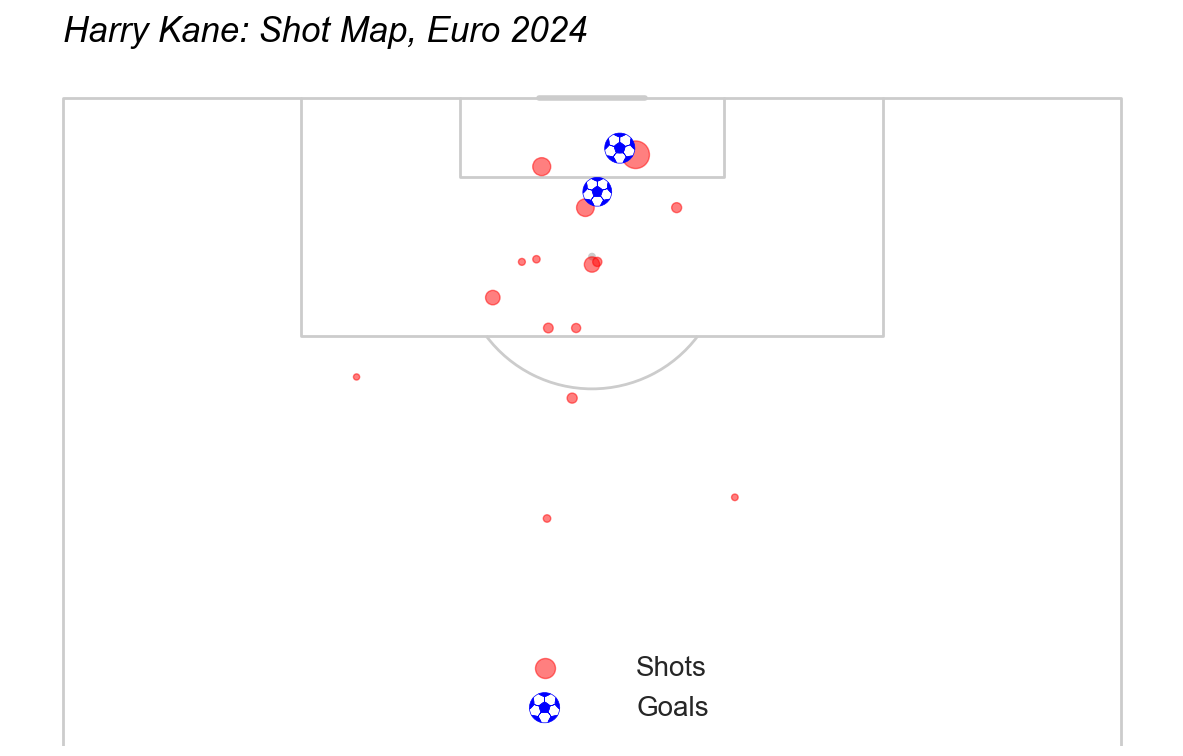

In [58]:
pitch = VerticalPitch(pitch_type='statsbomb',half=True,pad_bottom=-11)
fig, ax = pitch.draw(figsize=(12, 10))

shot_colour='red'
goal_colour='blue'

shots = pitch.scatter(player_shots_df.x, player_shots_df.y,
#make size relative to xG value
s=player_shots_df.shot_statsbomb_xg*1000,
c=shot_colour,
label='Shots',
marker='o',
alpha=0.5,
ax=ax)

goals = pitch.scatter(player_goals_df.x, player_goals_df.y,
#make size relative to xG value
s=player_goals_df.shot_statsbomb_xg*1000,
c='white',
edgecolors=goal_colour,
label='Goals',
marker='football',
ax=ax)

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

ax_text(0, 125, f'{xg_player}: Shot Map, Euro 2024', ha='left', c='black',va='center', fontsize=25,ax=ax,style='italic')